In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Index(['Date', 'Container', 'GCTI', 'CCFI', 'SCFI', 'IPI_TW',
       'Retail sales index_EU', 'Retail value_CN', 'Export_ basemetals ',
       'Import_chemical', 'Retail sales index_US', 'Container_SeasonIndex',
       'Export_chemical', 'Import_ base metals ',
       'Import_vegetable of products', 'WTI crude Oil', 'Export_ plastics'],
      dtype='object')


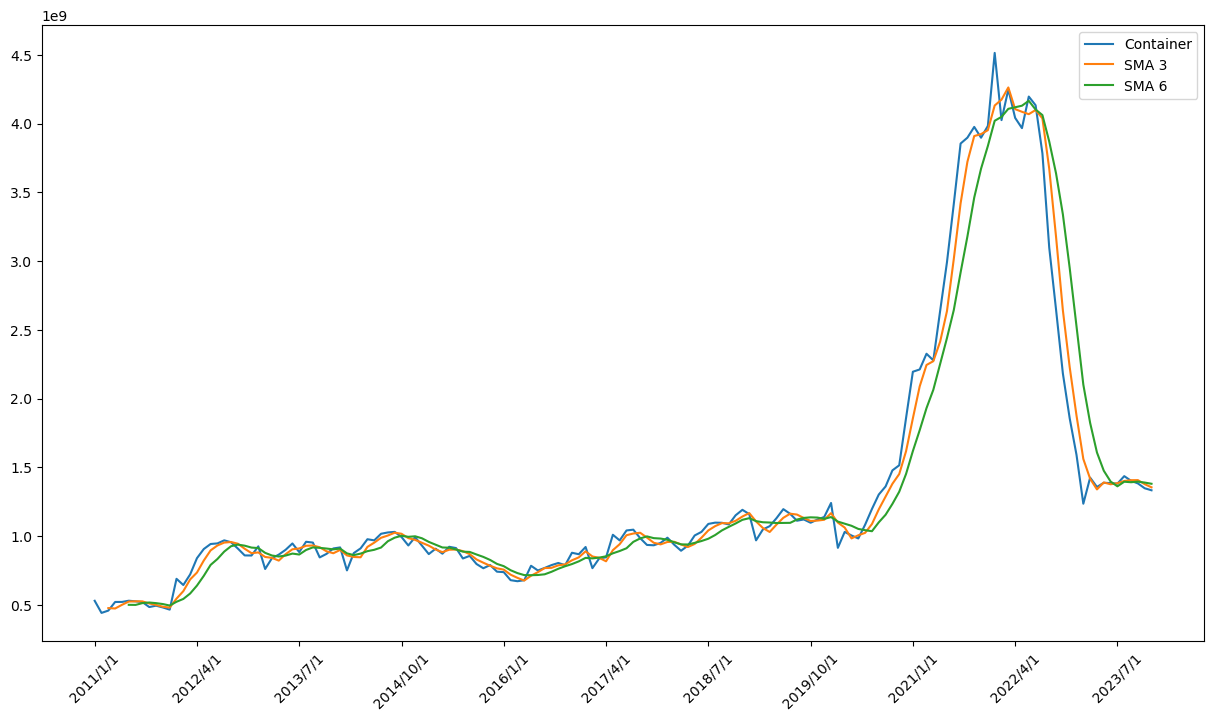

In [14]:
""" First Question """

# part ONE
# Getting the SMA to predict monthly sales of Container for n=3 and n=6.

# Reading the data
data_maritime = pd.read_csv('maritime.csv')
data_maritime = data_maritime.dropna()

print(data_maritime.columns)

x = data_maritime['Date']
y = data_maritime['Container']

# Calculating the SMA for n=3 and n=6
sma3 = y.rolling(window=3).mean()
sma6 = y.rolling(window=6).mean()

# Plotting the data
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Container')
plt.plot(x, sma3, label='SMA 3')
plt.plot(x, sma6, label='SMA 6')

plt.xticks(ticks=x[::len(x)//10], rotation=45)

plt.legend()
plt.show()

Container                1.000000
GCTI                     0.692227
CCFI                     0.950263
SCFI                     0.941176
Retail sales index_EU    0.663506
Retail sales index_US    0.799793
Name: Container, dtype: float64


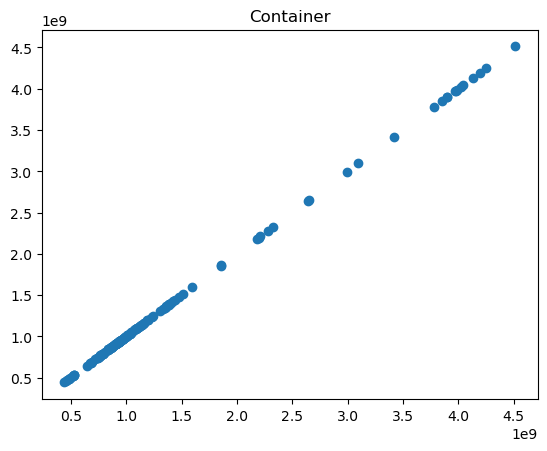

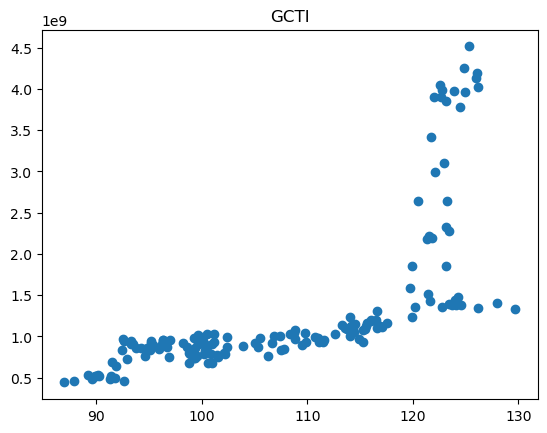

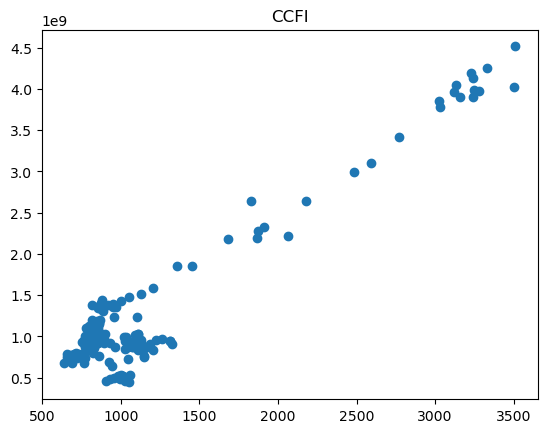

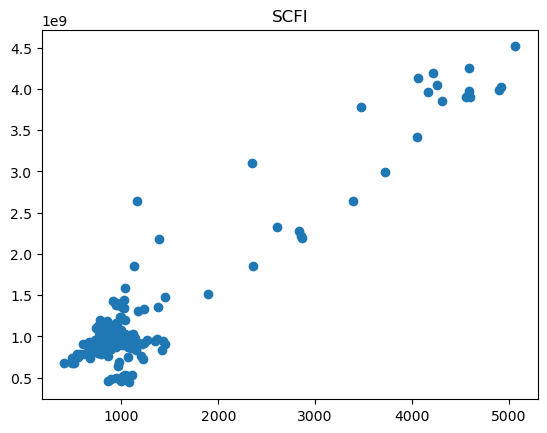

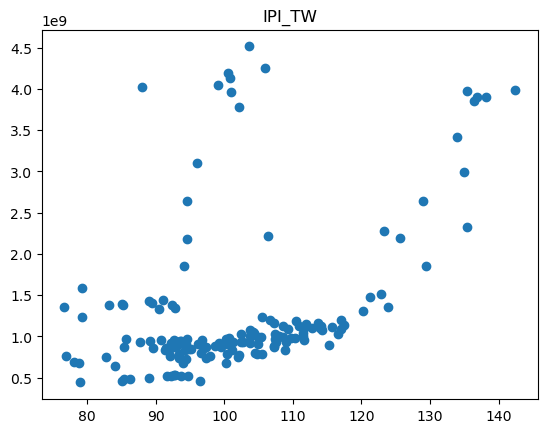

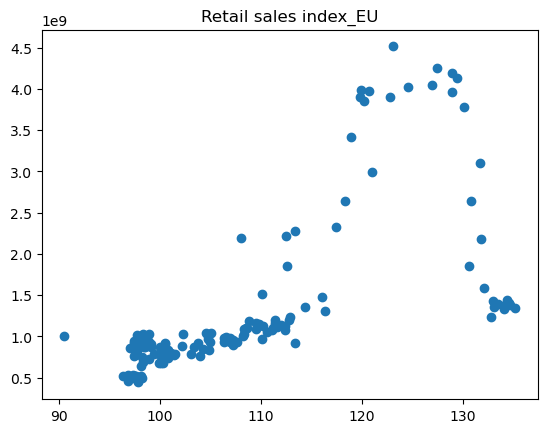

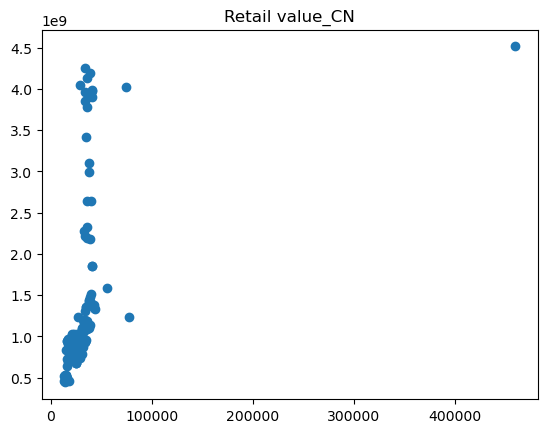

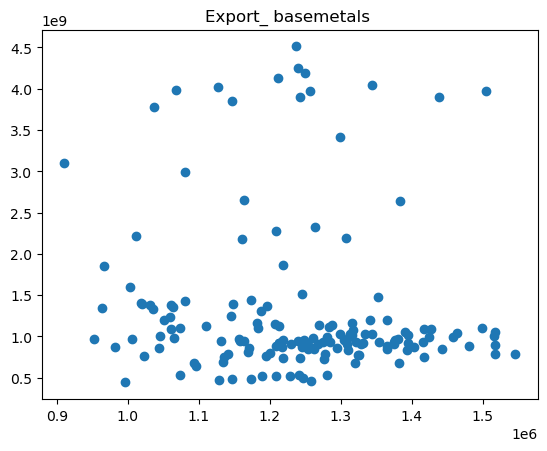

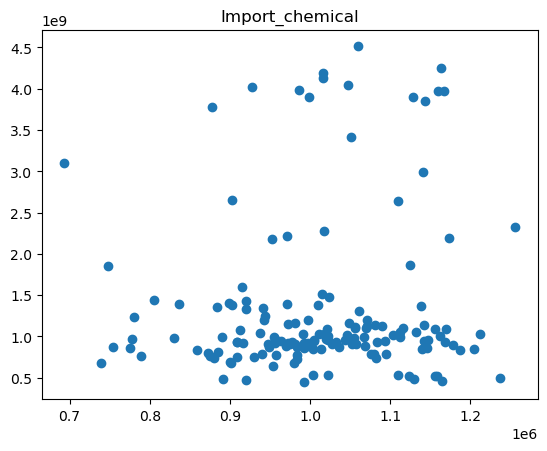

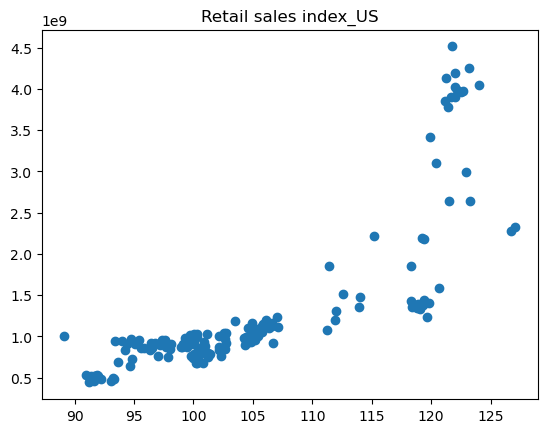

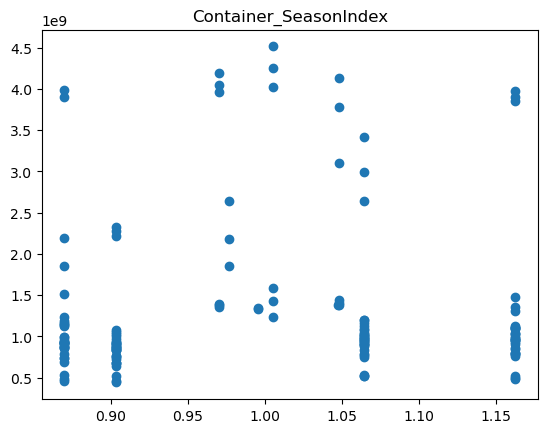

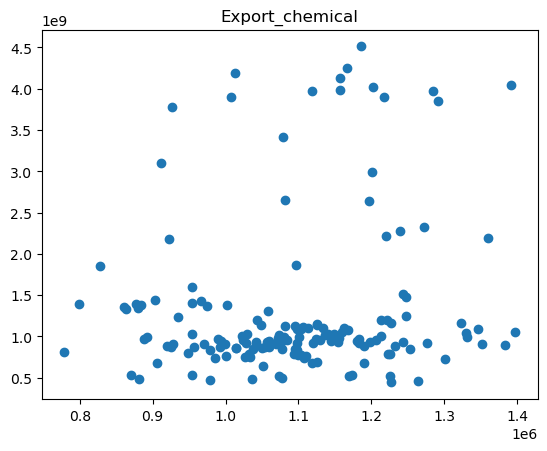

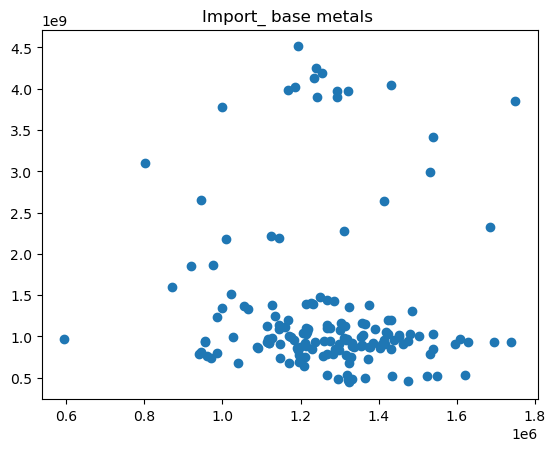

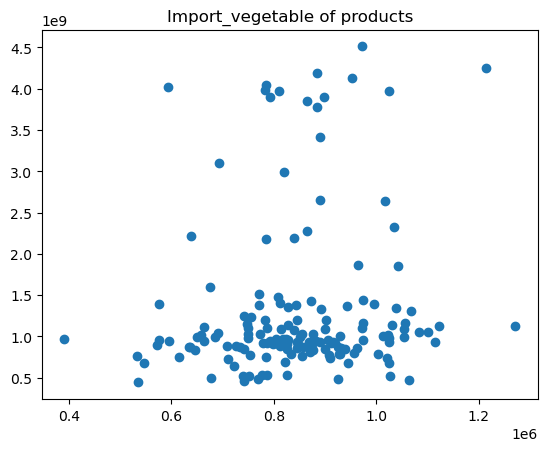

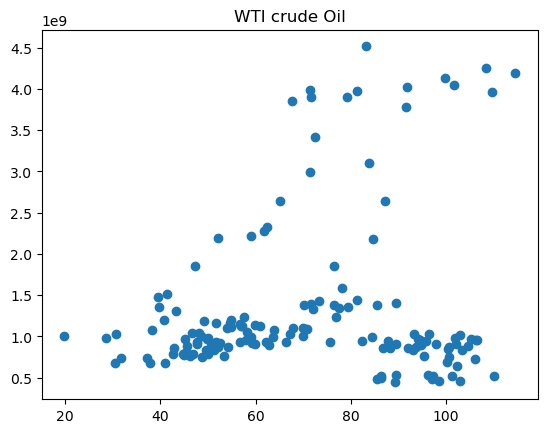

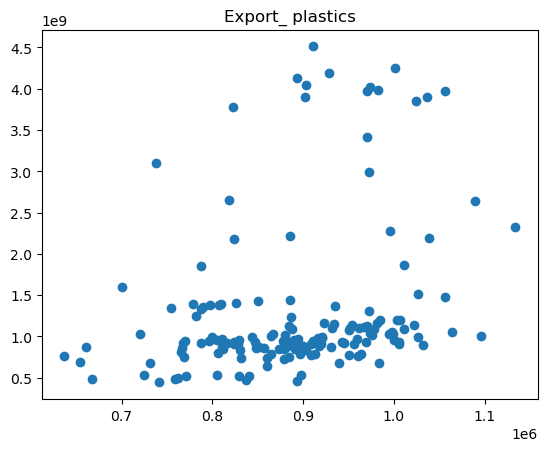

In [15]:
""" Still Question 1 """
# apply multiple linear regression (MLR) to conduct forecasting, indicate the significant predictors, R2

# Getting the data
# data = pd.read_csv('maritime.csv')
# data = data.dropna()

# Counting the corilation between the variables of each predictor without date
data_maritime_date = data_maritime['Date']
x_predictors = data_maritime.drop(['Date'], axis=1)
correlation = x_predictors.corr()["Container"]

# print(correlation)

print(correlation[correlation > 0.5])

# TODO: Explain the results

# standardizing the data
# x = data_maritime.drop(['Container', 'Date'], axis=1)
# y = data_maritime['Container']
# scaler = StandardScaler().fit(data_maritime)
# scaled = scaler.transform(data_maritime)

# # printing the scaled data in scatter plot
# plt.scatter(scaled[:, 0], scaled[:, 1])
# plt.show()
# plt.legend()

for column in x_predictors.columns:
    plt.scatter(data_maritime[column], data_maritime['Container'])
    plt.title(column)
    plt.show()





In [45]:
""" Question One part 3"""

# calculating the MLR
# Getting the predictors
x = data_maritime[['GCTI', 'CCFI', 'IPI_TW', 'Export_ basemetals ', 'Import_chemical', 'Retail sales index_US', 'Container_SeasonIndex', 'Import_ base metals ', 'Import_vegetable of products', 'WTI crude Oil']]
# Getting the target
y = data_maritime['Container']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying the MLR
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculating the RMSE, MAE, and MAPE for MLR
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MLR:")
print(f'RMSE for MLR: \t{rmse}')
print(f'MAE for MLR: \t{mae}')
print(f'MAPE for MLR: \t{mape}')

# MSA parts
rmse_sma3 = np.sqrt(mean_squared_error(data_maritime['Container'][2:], sma3.dropna()))
mae_sma3 = mean_absolute_error(data_maritime['Container'][2:], sma3.dropna())
mape_sma3 = np.mean(np.abs((data_maritime['Container'][2:] - sma3.dropna()) / data_maritime['Container'][2:])) * 100

rmse_sma6 = np.sqrt(mean_squared_error(data_maritime['Container'][5:], sma6.dropna()))
mae_sma6 = mean_absolute_error(data_maritime['Container'][5:], sma6.dropna())
mape_sma6 = np.mean(np.abs((data_maritime['Container'][5:] - sma6.dropna()) / data_maritime['Container'][5:])) * 100

print()
print("SMA3:")
print(f'RMSE SMA 3: \t{rmse_sma3}')
print(f'MAE SMA 3: \t{mae_sma3}')
print(f'MAPE SMA 3: \t{mape_sma3}')

print()
print("SMA6:")
print(f'RMSE SMA 6: \t{rmse_sma6}')
print(f'MAE SMA 6: \t{mae_sma6}')
print(f'MAPE SMA 6: \t{mape_sma6}')

MLR:
RMSE for MLR: 	80553465.52045058
MAE for MLR: 	62407305.73250646
MAPE for MLR: 	6.1548439328766165

SMA3:
RMSE SMA 3: 	126492349.37963654
MAE SMA 3: 	69455391.89025974
MAPE SMA 3: 	4.744153890782772

SMA6:
RMSE SMA 6: 	267226011.4558971
MAE SMA 6: 	142192384.97041944
MAPE SMA 6: 	9.213772620137073


In [44]:
import itertools
import tqdm

all_features = list(data_maritime.drop(['Container', 'Date'], axis=1).columns)
all_combinations = list(itertools.chain.from_iterable(itertools.combinations(all_features, r) for r in range(1, len(all_features) + 1)))

mn_rmse = 100000000
com = []

for combination in tqdm.tqdm(all_combinations):
    x = data_maritime[list(combination)]
    y = data_maritime['Container']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Applying the MLR
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    if rmse < mn_rmse:
        mn_rmse = rmse
        com = combination

print(mn_rmse)
print(com)

  0%|          | 21/32767 [00:00<02:40, 203.62it/s]

100%|██████████| 32767/32767 [02:37<00:00, 207.56it/s]

80553465.52045058
('GCTI', 'CCFI', 'IPI_TW', 'Export_ basemetals ', 'Import_chemical', 'Retail sales index_US', 'Container_SeasonIndex', 'Import_ base metals ', 'Import_vegetable of products', 'WTI crude Oil')


In [46]:
print(len(com))

10


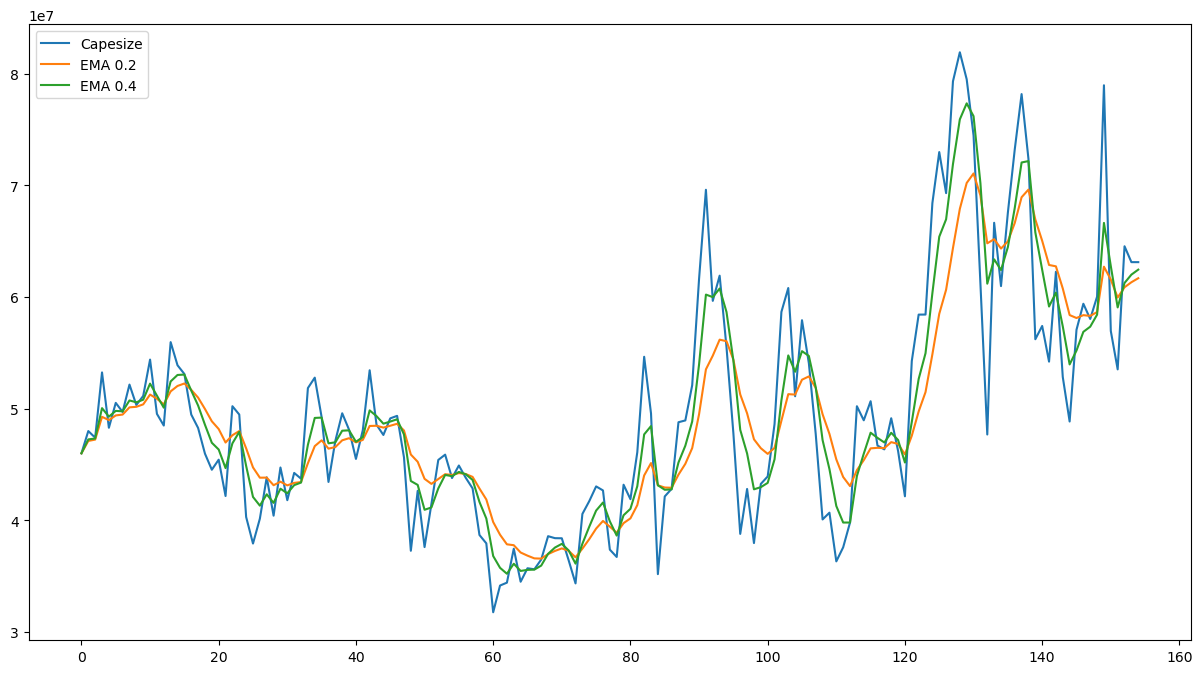

In [17]:
""" Finally Question 2 """

# Based on the attached file, conduct exponential moving average (EMA) to predict monthly sales of Capesize for alpha=0.2 and alpha=0.4

# Getting the data
data_capsize = pd.read_csv('maritime-capesize.csv')
data_capsize = data_capsize.dropna()
# Getting the target
y = data_capsize['Capesize']

# Calculating the EMA for alpha=0.2 and alpha=0.4
ema02 = y.ewm(alpha=0.2).mean()
ema04 = y.ewm(alpha=0.4).mean()

# Plotting the data

plt.figure(figsize=(15, 8))
plt.plot(y, label='Capesize')
plt.plot(ema02, label='EMA 0.2')
plt.plot(ema04, label='EMA 0.4')

plt.legend()
plt.show()

In [18]:
""" Question 2 getting the significant predictors """

# Getting the predictors
print(data_capsize.columns)

# count the correlation between the variables of each predictor without date
x_predictors = data_capsize.drop(['Date'], axis=1)
correlation = x_predictors.corr()["Capesize"]

print(correlation[correlation > 0.6])

Index(['Date', 'Capesize', 'BSI_t-1', 'BHI_t-1', 'BCI_t-1', 'BPI_t-1',
       'Australian thermal coal', 'Soybeans', 'Wheat', 'WTI crude Oil',
       'IMF_base metal index', 'Corn', 'CN_metal production',
       'Bulk(capesize)_SeasonIndex', 'Rock Phosphate', 'Iron Ore', 'PPI_CN',
       'PPI_US'],
      dtype='object')
Capesize    1.000000
BSI_t-1     0.771485
BHI_t-1     0.754689
BCI_t-1     0.630455
BPI_t-1     0.773032
PPI_US      0.702457
Name: Capesize, dtype: float64


In [19]:
"""  Question 2 part 3 """

# calculating the MLR
# Getting the predictors
x = data_capsize[["BSI_t-1","BHI_t-1","BCI_t-1","BPI_t-1","PPI_US"]]
# Getting the target
y = data_capsize['Capesize']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying the MLR
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculating the RMSE, MAE, and MAPE for MLR
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MLR:")
print(f'RMSE for MLR: \t{rmse}')
print(f'MAE for MLR: \t{mae}')
print(f'MAPE for MLR: \t{mape}')

# EMA parts
rmse_ema02 = np.sqrt(mean_squared_error(data_capsize['Capesize'], ema02))
mae_ema02 = mean_absolute_error(data_capsize['Capesize'], ema02)
mape_ema02 = np.mean(np.abs((data_capsize['Capesize'] - ema02) / data_capsize['Capesize'])) * 100

rmse_ema04 = np.sqrt(mean_squared_error(data_capsize['Capesize'], ema04))
mae_ema04 = mean_absolute_error(data_capsize['Capesize'], ema04)
mape_ema04 = np.mean(np.abs((data_capsize['Capesize'] - ema04) / data_capsize['Capesize'])) * 100

print()
print("EMA 0.2:")
print(f'RMSE EMA 0.2: \t{rmse_ema02}')
print(f'MAE EMA 0.2: \t{mae_ema02}')
print(f'MAPE EMA 0.2: \t{mape_ema02}')

print()
print("EMA 0.4:")
print(f'RMSE EMA 0.4: \t{rmse_ema04}')
print(f'MAE EMA 0.4: \t{mae_ema04}')
print(f'MAPE EMA 0.4: \t{mape_ema04}')


MLR:
RMSE for MLR: 	5414452.08500877
MAE for MLR: 	4521215.381519147
MAPE for MLR: 	9.203470694954976

EMA 0.2:
RMSE EMA 0.2: 	5590130.9469092265
MAE EMA 0.2: 	4084583.5742765134
MAPE EMA 0.2: 	8.097875779932629

EMA 0.4:
RMSE EMA 0.4: 	3778551.5528804385
MAE EMA 0.4: 	2754421.4952529115
MAPE EMA 0.4: 	5.4809995112868295
